In [ ]:
#
# DISCLAIMER OF WARRANTIES AND LIMITATION OF LIABILITY
#
# YOU ACKNOWLEDGE AND AGREE THAT THIS SOFTWARE IS PROVIDED TO YOU ON AN "AS IS" BASIS.
# IT IS THE PROPERTY OF JB QUANTITATIVE SOLUTIONS, LLC., THEREAFTER
# "THE LICENSOR". THE LICENSOR DISCLAIMS ANY AND ALL REPRESENTATIONS AND WARRANTIES, EXPRESS
# OR IMPLIED INCLUDING (WITHOUT LIMITATION) ANY IMPLIED WARRANTIES OF MERCHANTABILITY, OR HARDWARE
# OR SOFTWARE COMPATIBILITY, OR FITNESS FOR A PARTICULAR PURPOSE OR USE, INCLUDING YOUR PARTICULAR
# BUSINESS OR INTENDED USE, OR OF THE SOFTWARE'S RELIABILITY, PERFORMANCE OR CONTINUED AVAILABILITY.
# THE LICENSOR DOES NOT REPRESENT OR WARRANT THAT THE SOFTWARE OR CALCULATIONS OR PRINTS OR EXPORT
# DATA MADE THEREOF WILL BE FREE FROM VIRUSES OR MALWARE. YOU AGREE THAT YOU ARE SOLELY RESPONSIBLE
# FOR ALL COSTS AND EXPENSES ASSOCIATED WITH RECTIFICATION, REPAIR OR DAMAGE CAUSED BY SUCH DEFECTS,
# ERRORS OR INTERRUPTIONS. FURTHER, THE LICENSOR DOES NOT REPRESENT AND WARRANT THAT THE SOFTWARE
# DOES NOT INFRINGE THE INTELLECTUAL PROPERTY RIGHT OF ANY OTHER PERSON. YOU ACCEPT RESPONSIBILITY
# TO VERIFY THAT THE SOFTWARE MEETS YOUR SPECIFIC REQUIREMENTS.
# THE LICENSOR HEREBY STATES THAT THIS SOFTWARE IS PROVIDED FOR EDUCATIONAL PURPOSES ONLY
# AND THAT ANY OTHER USE, COMMERCIAL OR PERSONAL, IS NOT ALLOWED UNDER THE PRESENT TERMS.
# IN PARTICULAR, ANY USE OF THIS SOFTWARE FOR THE PURPOSE OF DETERMINING THE PRICE, BUYING, SELLING,
# TRADING, OR MAKING MARKETS IN ANY SECURITY TRADED ON ANY EXCHANGE, IS EXPLICITLY FORBIDDEN UNDER
# THE PRESENT TERMS.
# THIS SOFTWARE IS PROVIDED FOR INFORMATIONAL PURPOSES ONLY AND YOU SHOULD NOT CONSTRUE ANY
# SUCH INFORMATION OR OTHER MATERIAL AS LEGAL TAX, INVESTMENT, FINANCIAL, OR OTHER, ADVICE.
# NOTHING IN THIS SOFTWARE OR ANY OF ITS SUPPORTING MATERIAL CONSTITUTES A SOLICITATION, RECOMMENDATION,
# OR OFFER TO BUY OR SELL ANY SECURITIES OR OTHER FINANCIAL INSTRUMENTS IN ANY JURISDICTION.
# IN NO EVENT SHALL THE LICENSOR BE LIABLE TO YOU OR ANY THIRD PARTY UNDER THIS AGREEMENT OR OTHERWISE,
# WHETHER BY WAY OF INDEMNIFICATION OR OTHERWISE, UNDER ANY THEORY OF LIABILITY WHATSOEVER (INCLUDING,
# BUT NOT LIMITED TO, NEGLIGENCE AND STRICT LIABILITY) FOR ANY DIRECT OR INDIRECT, INCIDENTAL,
# CONSEQUENTIAL, SPECIAL, PUNITIVE OR EXEMPLARY DAMAGES OR REVENUE, LOST PROFITS OR EXPECTED
# BENEFIT NOT ACHIEVED, WHETHER FORESEEABLE OR NOT, WHETHER IN AN ACTION IN CONTRACT, TORT, PRODUCT
# LIABILITY OR STATUTE OR OTHERWISE, EVEN IF THE LICENSOR HAS BEEN ADVISED OF THE POSSIBILITY OF
# SUCH DAMAGE, RELATING TO THE SOFTWARE OR YOUR USE THEREOF, OR INABILITY TO USE THE SOFTWARE
# WHETHER OR EVEN IF THE LICENSOR HAS BEEN ADVISED, KNEW OR SHOULD HAVE KNOWN OF THE POSSIBILITY
# OF SUCH LOSS OR DAMAGES AND WITHOUT REGARD AS TO WHETHER SUCH LOSS OR DAMAGE WAS FORESEEABLE
# OR NOT. WITHOUT LIMITING THE GENERALITY OF THE FOREGOING, THE LICENSOR HAS NO OBLIGATION TO PROVIDE
# AND YOU SHALL HAVE NO RIGHT TO SEEK ANY REMEDY FOR ANY DEFECT, ERROR OR FAILURE OF THE SOFTWARE.
#
# BY USING THE CODE BELOW, YOU EXPLICITLY ACKNOWLEDGE YOU UNDERSTAND THE TERMS ABOVE, WILL ABIDE
# BY THEM, AND EXONERATE THE LICENSOR, JB QUANTITATIVE SOLUTIONS, LLC, OF ANY
# LIABILITY. YOU ALSO ACKNOWLEDGE THAT THIS DISCLAIMER IS AN INTEGRAL PART OF, AND SHOULD REMAIN
# ATTACHED TO, THE CODE BELOW.
# YOU ACKNOWLEDGE THAT YOU UNDERSTAND AND AGREE TO THE DISCLAIMER OF WARRANTIES AND THE LIMITATIONS
# ON LIABILITY AND REMEDIES CONTAINED IN THIS AGREEMENT. YOU FURTHER ACKNOWLEDGE THAT THE SOFTWARE IS
# BEING PROVIDED TO YOU WITHOUT A FEE OR WITH A REASONABLE FEE, THAT THE DISCLAIMERS AND LIMITATIONS
# ARE MATERIAL PROVISIONS OF THIS AGREEMENT AND THAT THE LICENSOR WOULD NOT MAKE THE SOFTWARE AVAILABLE
# TO YOU IF SUCH DISCLAIMERS AND LIMITATIONS WERE DELETED OR MODIFIED TO BE MORE FAVORABLE TO YOU.

In [1]:
from __future__ import print_function
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.optimize import least_squares
import scipy.integrate as integrate
from scipy import interpolate

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# data
symbol = 'INTC'
#symbol = 'SYNTHETIC_DATA'
day = '2015-01-29'
AggDataFileName = symbol + day + '.aggbook.dat'
print("Loading data from file %s..." % (AggDataFileName), end='')
file = open(AggDataFileName, 'rb')
Data = pickle.load(file)
file.close()
BidBook = Data['BidBook']
OfferBook = Data['OfferBook']
BidSizeBook = Data['BidSizeBook']
OfferSizeBook = Data['OfferSizeBook']
(T,nlevels) = BidBook.shape
nbins = {'INTC':30,'SYNTHETIC_DATA':25}
print("Done.")

Loading data from file INTC2015-01-29.aggbook.dat...Done.


In [4]:
# data preparation
print("Data preparation...")
BookDisplayWindow = 15
Book_ts = np.zeros((T,2 * BookDisplayWindow))
mid = np.zeros(T)
for t in range(T):
    mid[t] = 0.5 * ( BidBook[t][0] + OfferBook[t][0] )
    for k in range(nlevels):
        limit = BidBook[t,k]
        size = BidSizeBook[t,k]
        index = max(min(round((limit - mid[t]) * 100) + BookDisplayWindow, 2 * BookDisplayWindow - 1), 0)
        Book_ts[t, index] = 0.01 * size
    for k in range(nlevels):
        limit = OfferBook[t,k]
        size = OfferSizeBook[t,k]
        index = max(min(round((limit - mid[t]) * 100) + BookDisplayWindow, 2 * BookDisplayWindow - 1), 0)
        Book_ts[t, index] = 0.01 * size
    if ( t % 10000 == 0 ):
        print("Processing t=%d"%(t), end='\r', flush=True)
print("Done.")

Data preparation...
Done.ssing t=930000


Text(0.5, 1.0, 'INTC mid price')

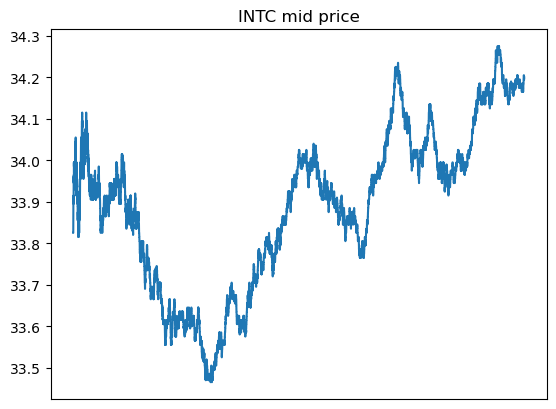

In [5]:
# mid price
plt.figure()
ax = plt.gca()
ax.axes.get_xaxis().set_ticks([])
plt.plot(mid,'-')
plt.title(symbol + ' mid price')

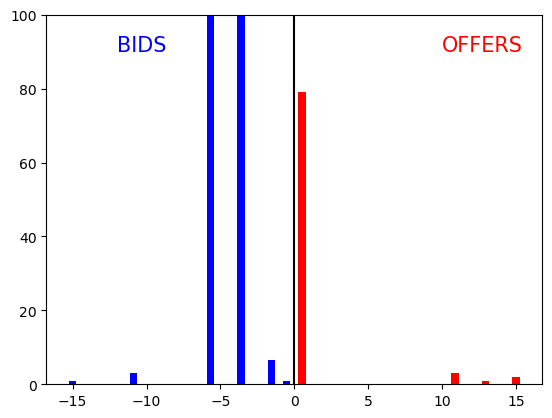

In [6]:
# display time series of order book
DisplayBook_ts = Book_ts[::10000,:]
fig=plt.figure()
xmin = - BookDisplayWindow
xmax = BookDisplayWindow
x = np.linspace(xmin, xmax, 2 * BookDisplayWindow)
barcollectionbid = plt.bar(x[:BookDisplayWindow],DisplayBook_ts[0,:BookDisplayWindow],width=0.5, bottom=None, align='center',color='blue')
barcollectionoffer = plt.bar(x[BookDisplayWindow:],DisplayBook_ts[0,BookDisplayWindow:],width=0.5, bottom=None, align='center',color='red')
plt.axvline(x = 0.0, color = 'black')
plt.text(10, 90, 'OFFERS',fontsize=15,color='red')
plt.text(-12, 90, 'BIDS',fontsize=15,color='blue')


plt.ylim([0,100])
def animate(t):
    y=DisplayBook_ts[t,:BookDisplayWindow]
    for i, b in enumerate(barcollectionbid):
        b.set_height(y[i])
    y=DisplayBook_ts[t,BookDisplayWindow:]
    for i, b in enumerate(barcollectionoffer):
        b.set_height(y[i])
anim = matplotlib.animation.FuncAnimation(fig, animate, repeat=False, frames=len(DisplayBook_ts))
#Jupyter
HTML(anim.to_jshtml())

Text(0.5, 1.0, 'Book size (one side), histogram; unit = 10,000 shares')

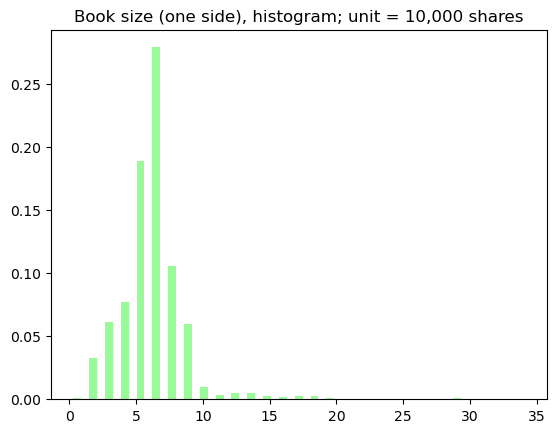

In [7]:
# histogram of book's total size (one-sided)

BookTotalSize = np.zeros(2 * T)
BookTotalSize[:T] = 1e-4 * np.sum(BidSizeBook,axis=1)
BookTotalSize[T:] = 1e-4 * np.sum(OfferSizeBook,axis=1)
#Bins = list(np.linspace(0, 30, 30))
Bins = list(np.linspace(0, np.percentile(BookTotalSize,99.9), nbins[symbol]))
BookSizeHistogram = np.array(np.histogram(BookTotalSize, bins=Bins)[0]).astype('float')
dv = Bins[1] - Bins[0]
BookSizeHistogram /= (dv * np.sum(BookSizeHistogram)) #frequencies
ClassCenters = np.zeros(len(Bins) - 1)
ClassCenters = 0.5 * (np.array(Bins[1:]).astype('float') + np.array(Bins[:-1]).astype('float'))
plt.figure()
plt.bar(ClassCenters,BookSizeHistogram,width=dv/2,color='palegreen')
plt.title("Book size (one side), histogram; unit = 10,000 shares")

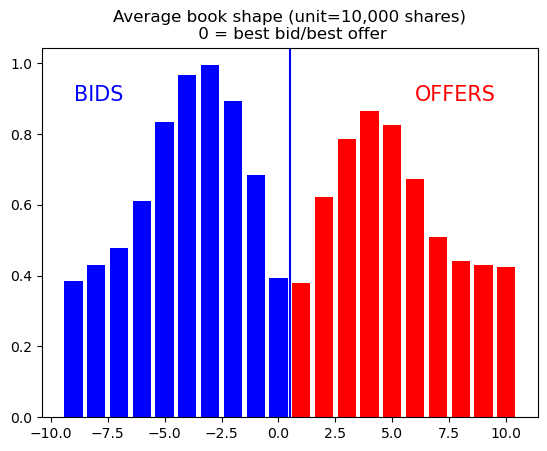

In [8]:
# average book shape
BookShape = np.zeros(2*nlevels)
BookShape[:nlevels] = np.flip(1e-4 * np.mean(BidSizeBook,axis=0))
BookShape[nlevels:] = 1e-4 * np.mean(OfferSizeBook,axis=0)

plt.figure()
#plt.bar(range(-nlevels + 1, nlevels + 1), BookShape)
plt.bar(range(-nlevels + 1, 1), BookShape[:nlevels],color='blue')
plt.bar(range(1, nlevels+1), BookShape[nlevels:],color='red')
plt.axvline(x = 0.5, color = 'blue')
plt.title('Average book shape (unit=10,000 shares)\n 0 = best bid/best offer')
#plt.text(6, 0.8, 'OFFERS',fontsize=15,color='red')
#plt.text(-9, 0.8, 'BIDS',fontsize=15,color='blue')
plt.text(6, 0.9 * max(BookShape), 'OFFERS',fontsize=15,color='red');
plt.text(-9, 0.9 * max(BookShape), 'BIDS',fontsize=15,color='blue');

1st model: using alpha=mu^2; mu=0.15, v0=6.51
2nd model: found optimal param q=0.68; using mu=0.20; v0=6.51


/var/folders/hy/ldt99k4j7nxghm8r43n9r06m0000gn/T/ipykernel_44279/829984979.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_dirac_vals[k] = p_dirac(q,ClassCenters[k])


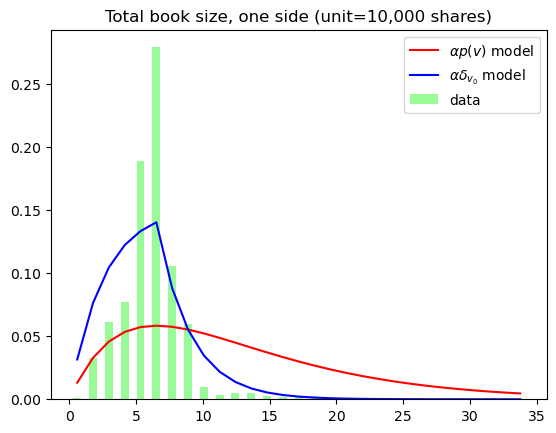

In [9]:
# fitting models to the histogram of the book's total size (one side)
ClassCenters = np.zeros(len(Bins) - 1)
ClassCenters = 0.5 * (np.array(Bins[1:]).astype('float') + np.array(Bins[:-1]).astype('float'))

# alpha * p(v) model with alpha = mu^2
n = len(ClassCenters)
ind_v0 = np.argmax(BookSizeHistogram)
v0 = ClassCenters[ind_v0]
def p(v): # p(v) = mu^2 v exp(-mu v)
    return (v/v0) * np.exp(-v/v0) / v0
p_vals = np.zeros(n)
for k in range(n):
    p_vals[k] = p(ClassCenters[k])
p_vals /= dv * np.sum(p_vals) # normalization due to truncation
print("1st model: using alpha=mu^2; mu=%1.2f, v0=%1.2f"%(1/v0,v0))

# alpha * Dirac_v0 model; q = exp(-2mu)
def p_dirac(q, v):
    if v <= v0:
        return (1/v0)*(1. - np.power(q,v))
    else:
        return (1/v0)*(np.power(q,-v0) - 1.) * np.power(q,v)
def obj_fun(q):
    p_dirac_vals = np.zeros(n)
    for k in range(n):
        p_dirac_vals[k] = p_dirac(q,ClassCenters[k])
    p_dirac_vals /= dv * np.sum(p_dirac_vals)
    return p_dirac_vals - BookSizeHistogram
res = least_squares(obj_fun,0.5,bounds=(0.01,0.99)) # fit the model to the data
q_opt = res['x'][0]
print("2nd model: found optimal param q=%1.2f; using mu=%1.2f; v0=%1.2f"%(q_opt,-np.log(q_opt)/2,v0))
p_dirac_vals = np.zeros(n)
for k in range(n):
    p_dirac_vals[k] = p_dirac(q_opt, ClassCenters[k])
p_dirac_vals /= dv * np.sum(p_dirac_vals) # normalization due to truncation

plt.figure()
plt.bar(ClassCenters,BookSizeHistogram,width = dv/2,color='palegreen')
plt.plot(ClassCenters,p_vals,color='red')
plt.plot(ClassCenters,p_dirac_vals,color='blue')
plt.legend([r'$\alpha p(v)$ model',r'$\alpha\delta_{v_0}$ model','data'])
plt.title('Total book size, one side (unit=10,000 shares)');

Fitting BMP model to side -1 of the book...Done.
 optim_params= [ 0.68044294  0.34092831 -0.24308805  0.05284056]
Fitting BMP model to side 1 of the book...Done.
 optim_params= [ 0.63009852  0.32856762 -0.26136205  0.12391334]


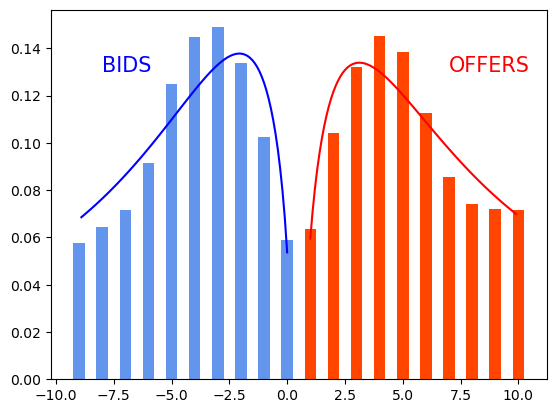

In [10]:
# Bouchaud-Mezard-Potters model
def rho0_values(x_input,mu):
    xmin = 1e-4
    xmax = 20.
    nx = 1000
    x = np.linspace(xmin, xmax, nx)
    dx = x[1] - x[0]
    rho0_val = np.zeros(nx)
    rho0_int = 0.
    for k in range(nx):
        int_1 = integrate.quad(lambda y:np.power(y,-1-mu)*np.sinh(y),0,x[k])
        int_2 = integrate.quad(lambda y:np.power(y,-1-mu)*np.exp(-y),x[k],np.inf)
        rho0_val[k] = np.exp(-x[k]) * int_1[0] + np.sinh(x[k]) * int_2[0]
        rho0_int += rho0_val[k] * dx
    rho0_val /= rho0_int
    rho0_interp = interpolate.interp1d(x, rho0_val)
    def rho0(x_val,mu):
        mu_str = str(mu)
        if x_val < x[0]:
            return rho0_interp(x[0])
        elif x_val > x[-1]:
            return rho0_interp(x[-1])
        else:
            return rho0_interp(x_val)
    res = np.zeros(len(x_input))
    for k in range(len(x_input)):
        res[k] = rho0(x_input[k],mu)
    return res

# fitting the model to the data
x_depth = {}
y_depth = {}
x_depth_fine_grained ={}
optim_val_rho = {}
for side in [-1,1]:
    x_depth[side] = np.array(range(1,nlevels+1))
    if side == -1:
        y_depth[side] = BookShape[nlevels:]
    else:
        y_depth[side] = np.flip(BookShape[:nlevels])
    y_depth[side] /= np.sum(y_depth[side])

    def obj_fun(params):
        C = params[0]
        a = params[1]
        b = params[2]
        mu = params[3]
        res = C * rho0_values(a * x_depth[side] + b,mu) - y_depth[side]
        return res
    params0 = (1.,0.1,0.,0.6)
    print("Fitting BMP model to side %d of the book..."%(side),end='')
    res = least_squares(obj_fun,params0,bounds=([0.1,0.01,-1.,0.01],[10.,1.,1.,0.9]))
    print("Done.\n optim_params=",res['x'])
    optim_params = res['x']
    C = optim_params[0]
    a = optim_params[1]
    b = optim_params[2]
    mu = optim_params[3]
    x_depth_fine_grained[side] = np.arange(x_depth[side][0],x_depth[side][-1],0.1)
    optim_val_rho[side] = C * rho0_values(a * x_depth_fine_grained[side] + b,mu)

plt.figure()
plt.bar(x_depth[-1],y_depth[-1],width=0.5, bottom=None, align='center',color='orangered')
plt.plot(x_depth_fine_grained[-1],optim_val_rho[-1],color='red')
plt.bar(1-x_depth[1],y_depth[1],width=0.5, bottom=None, align='center',color='cornflowerblue')
plt.plot(1-x_depth_fine_grained[1],optim_val_rho[1],color='blue')
plt.text(7, 0.13, 'OFFERS',fontsize=15,color='red');
plt.text(-8, 0.13, 'BIDS',fontsize=15,color='blue');


plt.show()